In [41]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
dados = pd.read_csv('base_preprocessamento_02.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   education                  5898 non-null   object
 1   joiningyear                5898 non-null   int64 
 2   city                       5898 non-null   object
 3   paymenttier                5898 non-null   int64 
 4   age                        5898 non-null   int64 
 5   gender                     5898 non-null   object
 6   everbenched                5898 non-null   object
 7   experienceincurrentdomain  5898 non-null   int64 
 8   leaveornot                 5898 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 414.8+ KB


# Tratamento de atributo categorico ordinal

Vamos explorar como é possível tratar a coluna categórica ordinal (coluna ```education```)

In [42]:
dados.education.value_counts()

education
Bachelors      3729
Masters        1000
High School     851
PHD             318
Name: count, dtype: int64

Criar um dicionário para ser utilizado no mapeamento de dados

In [43]:
dicionario = {
    "High School":1,
    "Bachelors":2,
    "Masters":3,
    "PHD":4
}

In [44]:

dados['education'] = dados['education'].map(dicionario)

In [45]:
dados.education.value_counts()

education
2    3729
3    1000
1     851
4     318
Name: count, dtype: int64

In [46]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   education                  5898 non-null   int64 
 1   joiningyear                5898 non-null   int64 
 2   city                       5898 non-null   object
 3   paymenttier                5898 non-null   int64 
 4   age                        5898 non-null   int64 
 5   gender                     5898 non-null   object
 6   everbenched                5898 non-null   object
 7   experienceincurrentdomain  5898 non-null   int64 
 8   leaveornot                 5898 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 414.8+ KB


# Tratamento de um boleano puro

Coluna ```everbenched```

In [47]:
import numpy as np
dados['everbenched'] = np.where(
    dados['everbenched']=='No',0,1
)

In [48]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   education                  5898 non-null   int64 
 1   joiningyear                5898 non-null   int64 
 2   city                       5898 non-null   object
 3   paymenttier                5898 non-null   int64 
 4   age                        5898 non-null   int64 
 5   gender                     5898 non-null   object
 6   everbenched                5898 non-null   int32 
 7   experienceincurrentdomain  5898 non-null   int64 
 8   leaveornot                 5898 non-null   int64 
dtypes: int32(1), int64(6), object(2)
memory usage: 391.8+ KB


Tratamento de dados categóricos gerais

In [49]:
dados.city.value_counts()

city
Bangalore    2406
Pune         1444
New Delhi    1325
Chennai       186
Ahmedabad     182
Hyderabad     182
Mumbai        173
Name: count, dtype: int64

In [50]:
dados.gender.value_counts()

gender
Male      3518
Female    2380
Name: count, dtype: int64

Método ```get_dummies```

In [51]:
dados = pd.get_dummies(dados,columns=['city','gender'],dtype=int)
dados

,education,joiningyear,paymenttier,age,everbenched,experienceincurrentdomain,leaveornot,city_Ahmedabad,city_Bangalore,city_Chennai,city_Hyderabad,city_Mumbai,city_New Delhi,city_Pune,gender_Female,gender_Male
0,2,2017,3,34,0,0,0,0,1,0,0,0,0,0,0,1
1,2,2013,1,28,0,3,1,0,0,0,0,0,0,1,1,0
2,2,2014,3,38,0,2,0,0,0,0,0,0,1,0,1,0
3,3,2016,3,27,0,5,1,0,1,0,0,0,0,0,0,1
4,3,2017,3,24,0,2,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,2,2012,3,32,0,2,1,0,0,0,1,0,0,0,1,0
5894,1,2017,3,29,0,2,0,0,1,0,0,0,0,0,0,1
5895,1,2013,3,25,0,5,1,0,0,0,0,0,1,0,1,0
5896,1,2011,3,29,0,5,0,1,0,0,0,0,0,0,0,1


In [52]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   education                  5898 non-null   int64
 1   joiningyear                5898 non-null   int64
 2   paymenttier                5898 non-null   int64
 3   age                        5898 non-null   int64
 4   everbenched                5898 non-null   int32
 5   experienceincurrentdomain  5898 non-null   int64
 6   leaveornot                 5898 non-null   int64
 7   city_Ahmedabad             5898 non-null   int32
 8   city_Bangalore             5898 non-null   int32
 9   city_Chennai               5898 non-null   int32
 10  city_Hyderabad             5898 non-null   int32
 11  city_Mumbai                5898 non-null   int32
 12  city_New Delhi             5898 non-null   int32
 13  city_Pune                  5898 non-null   int32
 14  gender_Female           

# Organizando as colunas

Deixando a coluna target ```leaveornot``` por último

In [58]:
colunas = dados.columns.tolist()
colunas.remove('leaveornot')
colunas.append('leaveornot')
dados = dados[colunas]

In [59]:
dados

,education,joiningyear,paymenttier,age,everbenched,experienceincurrentdomain,city_Ahmedabad,city_Bangalore,city_Chennai,city_Hyderabad,city_Mumbai,city_New Delhi,city_Pune,gender_Female,gender_Male,leaveornot
0,2,2017,3,34,0,0,0,1,0,0,0,0,0,0,1,0
1,2,2013,1,28,0,3,0,0,0,0,0,0,1,1,0,1
2,2,2014,3,38,0,2,0,0,0,0,0,1,0,1,0,0
3,3,2016,3,27,0,5,0,1,0,0,0,0,0,0,1,1
4,3,2017,3,24,0,2,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,2,2012,3,32,0,2,0,0,0,1,0,0,0,1,0,1
5894,1,2017,3,29,0,2,0,1,0,0,0,0,0,0,1,0
5895,1,2013,3,25,0,5,0,0,0,0,0,1,0,1,0,1
5896,1,2011,3,29,0,5,1,0,0,0,0,0,0,0,1,0


Text(0.5, 1.0, 'Matriz de Correlação')

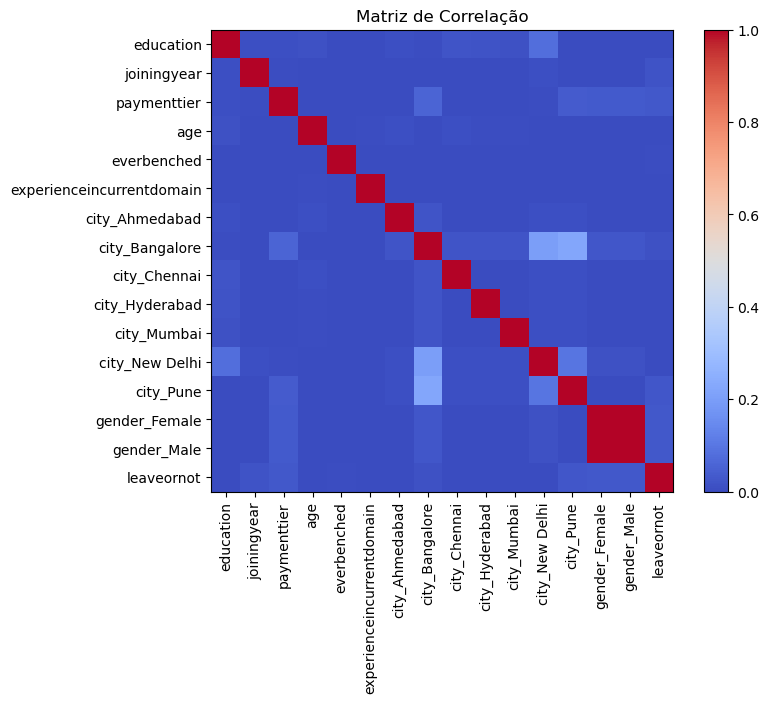

In [65]:
import matplotlib.pyplot as plt
corr_matrix = dados.corr()**2
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(corr_matrix, cmap='coolwarm', vmin=0, vmax=1)
fig.colorbar(cax)
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
plt.xticks(rotation=90)
ax.set_title("Matriz de Correlação")

In [66]:
dados.to_csv('base_preprocessamento_03.csv',index=False)